#NAME:veena T.G.S
ROLL NO:225229145
SUB:PML -LAB6

STEP 1

In [1]:
import pandas as pd

In [2]:
a=pd.read_csv('diabetes.csv')
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
a.shape

(768, 9)

In [5]:
a.shape[1]

9

In [6]:
type(a)

pandas.core.frame.DataFrame

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
a['BloodPressure'].value_counts
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### STEP 2

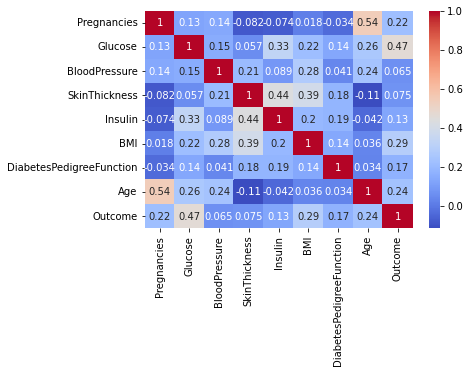

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(a.corr(), cmap='coolwarm', annot=True)
plt.show()


### STEP 3

In [10]:
from sklearn.linear_model import LogisticRegression

# Select the features and target variable
X = a[['Age']]
y = a['Outcome']

# Create a logistic regression object
logreg = LogisticRegression()

# Fit the model to the data
logreg.fit(X, y)

# Print the model parameters
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)


Coefficients: [[0.04202466]]
Intercept: [-2.04744865]


In [13]:
# Predict the outcome for a person of 60 years old
new_data = pd.DataFrame({'Age': [60]})
outcome = logreg.predict(new_data)

# Print the outcome
if outcome[0] == 1:
    print("The person is predicted to have diabetes.")
else:
    print("The person is predicted to not have diabetes.")

The person is predicted to have diabetes.


In [14]:
lrf = logreg.coef_ * 60 + logreg.intercept_
from scipy.special import expit
if expit(lrf) > 0.5:
    print('YES,he will become diabetic')
else:
    print('NO,he will not be diabetic')

YES,he will become diabetic


### STEP 4

In [15]:
X = a[['Glucose', 'BMI', 'Age']]

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(X, y)

LogisticRegression()

In [18]:
logreg.predict([[150, 30, 40]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
logreg.predict_proba([[150, 30, 40]])

array([[0.46580162, 0.53419838]])

### STEP 5 [Build LoR model with all features]

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
X1 = a.drop('Outcome', axis=1)
logreg1 = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,train_size=0.8,test_size=0.2)
logreg1 .fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logreg1.predict(X_test)

In [22]:
from sklearn.metrics import roc_auc_score
print("LoR AUC ", roc_auc_score(y_test, y_pred))

LoR AUC  0.7319792566983578


### STEP 6 [Forword Selection Procedure]

In [ ]:
type(a.columns)

pandas.core.indexes.base.Index

In [23]:
def get_auc(var,tar,df):
    fX = df[var]
    fy = df[tar]
    logreg = LogisticRegression()
    logreg.fit(fX,fy)
    pred=logreg.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y,pred)
    return auc_val
get_auc(["BMI","Glucose"],["Outcome"],a)


0.8109328358208956

In [24]:
get_auc(['Pregnancies', 'BloodPressure', 'SkinThickness'],["Outcome"],a)

0.6444962686567164

In [25]:
def next_best(current,cand,tar,a):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = get_auc(current+[i],tar,a)
        if auc_v>=best_auc:
            best_auc = auc_v
            best_var = i
        return best_var


In [26]:
tar = ["Outcome"]
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies', 'BloodPressure', 'SkinThickness']
next_var = next_best(current,cand,tar,a)
print(next_var)

Pregnancies


In [27]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Diabe']
max_num = 5
num_it = min(max_num,len(cand))
for i in range(0,num_it):
     next_var = next_best(current,cand,tar,a)
     current = current + [next_var]
     cand.remove(next_var)
     print("Variable added in step " + str(i+1) + " is " + next_var + ".")
print(current)


Variable added in step 1 is Pregnancies.
Variable added in step 2 is Glucose.
Variable added in step 3 is BloodPressure.
Variable added in step 4 is SkinThickness.
Variable added in step 5 is Insulin.
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']


### STEP 7 [Plot line grap of AUC values and select cut-off]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.5,stratify =y)

In [32]:
pred2 = logreg1.predict_proba(X_test)

In [33]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

In [34]:
def auc_train_test(variables,target,train,test):
     X_train = train[variables]
     X_test = test[variables]
     Y_train = train[target]
     Y_test = test[target]
     logreg = LogisticRegression()

 # Fit the model on train data
     logreg.fit(X_train, Y_train)

 # Calculate the predictions both on train and test data
     predictions_train = logreg.predict_proba(X_train)[:,1]
     predictions_test = logreg.predict_proba(X_test)[:,1]

 # Calculate the AUC both on train and test data
     auc_train = roc_auc_score(Y_train, predictions_train)
     auc_test = roc_auc_score(Y_test,predictions_test)
     return(auc_train, auc_test)

In [36]:
auc_values_train = []
auc_values_test = []
variables_evaluate = []
# Iterate over the variables in variables
for v in X1.columns:

 # Add the variable
     variables_evaluate.append(v)

 # Calculate the train and test AUC of this set of variables
     auc_train, auc_test = auc_train_test(variables_evaluate,["Outcome"],train,test)

 # Append the values to the lists
     auc_values_train.append(auc_train)
     auc_values_test.append(auc_test)

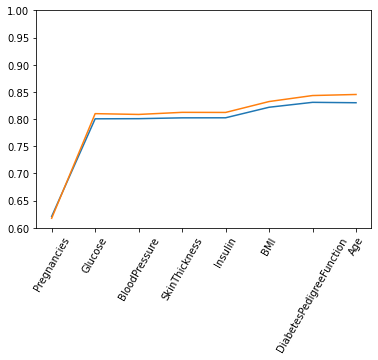

In [38]:
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np
x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x,X1.columns,rotation=60)
plt.plot(x,my_train)
plt.plot(x,my_test)
plt.ylim((0.6,1.0))
plt.show()

### Step8. [Draw Cumulative Gain Chart and Lift Chart]


In [39]:
pip install scikit.plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


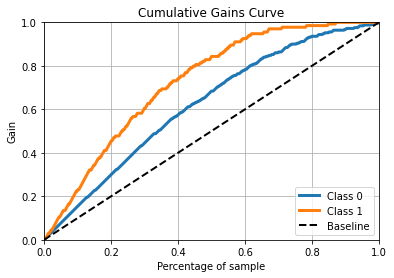

<Figure size 504x504 with 0 Axes>

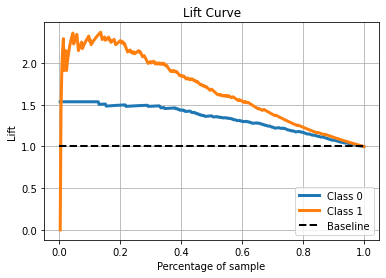

In [40]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,pred2)
plt.show()
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test,pred2)
plt.show()